In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import math

In [4]:
df = pd.read_csv("all_stocks_5yr.csv")

In [5]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500.0,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000.0,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000.0,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500.0,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900.0,AAL


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43772 entries, 0 to 43771
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    43772 non-null  object 
 1   open    43772 non-null  float64
 2   high    43772 non-null  float64
 3   low     43772 non-null  float64
 4   close   43771 non-null  float64
 5   volume  43771 non-null  float64
 6   Name    43771 non-null  object 
dtypes: float64(5), object(2)
memory usage: 2.3+ MB


In [7]:
df.describe()

,open,high,low,close,volume
count,43772.000000,43772.000000,43772.000000,43771.000000,4.377100e+04
mean,80.935148,81.724488,80.125899,80.948735,5.420723e+06
std,56.902384,57.507784,56.239100,56.883607,1.298176e+07
min,1.620000,1.690000,1.610000,1.620000,7.802900e+04
25%,46.320000,46.760000,45.897500,46.340000,1.084540e+06
50%,62.870000,63.400000,62.342500,62.910000,2.022664e+06
75%,98.500000,99.450000,97.712500,98.580000,4.208745e+06
max,337.080000,340.340000,335.060000,339.500000,2.683365e+08


In [8]:
coloums = []
d = set()
for x in df['Name']:
  d.add(x)
for x in d:
  coloums.append(x)
coloums = coloums[11:]
df = df[~df['Name'].isin(coloums)]

<Axes: xlabel='Name', ylabel='count'>

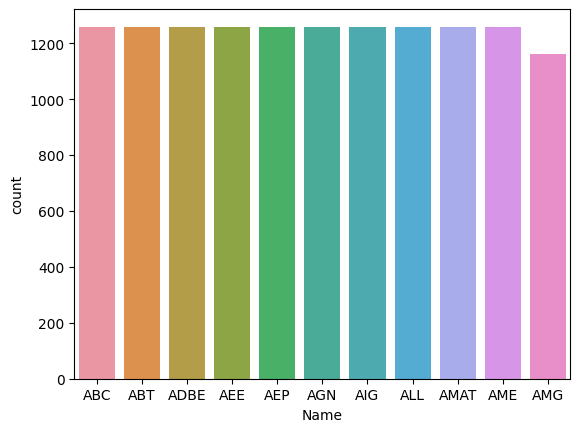

In [9]:
sns.countplot(x=df['Name'],data=df)

In [10]:
df.dropna(inplace=True)

In [11]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

In [12]:
df = pd.get_dummies(df,columns = ['Name'],drop_first = True)

In [13]:
import statsmodels.api as sn

In [14]:
columns_to_drop = ["close"]
x_multi = df.drop(columns = columns_to_drop,axis = 1)

In [15]:
x_multi.head()

,date,open,high,low,volume,Name_ABT,Name_ADBE,Name_AEE,Name_AEP,Name_AGN,Name_AIG,Name_ALL,Name_AMAT,Name_AME,Name_AMG
5036,2013-02-08,46.52,46.895,46.46,1232802.0,0,0,0,0,0,0,0,0,0,0
5037,2013-02-11,46.85,47.000,46.50,1115888.0,0,0,0,0,0,0,0,0,0,0
5038,2013-02-12,46.70,47.050,46.60,1318773.0,0,0,0,0,0,0,0,0,0,0
5039,2013-02-13,46.74,46.900,46.60,2645247.0,0,0,0,0,0,0,0,0,0,0
5040,2013-02-14,46.67,46.990,46.60,1941879.0,0,0,0,0,0,0,0,0,0,0


In [16]:
y_multi = df["close"]

In [17]:
x = sn.add_constant(x_multi)

In [18]:
y_multi.info()

<class 'pandas.core.series.Series'>
Int64Index: 13751 entries, 5036 to 43770
Series name: close
Non-Null Count  Dtype  
--------------  -----  
13751 non-null  float64
dtypes: float64(1)
memory usage: 214.9 KB


In [19]:
x.dropna(inplace = True)
y_multi.dropna(inplace=True)

In [20]:
x["year"] = x["date"].dt.year
x["month"] = x["date"].dt.month
x["day"] = x["date"].dt.day

In [21]:
x = x.drop("date",axis=1)

In [22]:
lm = sn.OLS(y_multi,x).fit()

In [23]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.593e+06
Date:                Sat, 06 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:45:53   Log-Likelihood:                -13518.
No. Observations:               13751   AIC:                         2.707e+04
Df Residuals:                   13733   BIC:                         2.721e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7190      8.629     -0.431      0.666     -20.632      13.194
open          -0.5257      0.007    -78.416      0.000      -0.539      -0.513
high           0.7788      0.006    129.645      0.000       0.767       0.791
low            0.7471      0.006    132.700      0.000       0.736       0.758
volume     -1.918e-09   1.68e-09     -1.142      0.253   -5.21e-09    1.37e-09
Name_ABT       0.0079      0.029      0.274      0.784      -0.049       0.064
Name_ADBE      0.0460      0.026      1.775      0.076      -0.005       0.097
Name_AEE       0.0107      0.027      0.390      0.697      -0.043       0.065
Name_AEP       0.0118      0.027      0.446      0.655      -0.040       0.064
Name_AGN      -0.0951      0.044     -2.147      0.032      -0.182      -0.008
Name_AIG       0.0052      0.029      0.180      0.857      -0.051       0.062
Name_ALL      -0.0106      0.026     -0.404      0.686      -0.062       0.041
Name_AMAT      0.0349      0.035      0.999      0.318      -0.034       0.103
Name_AME       0.0029      0.027      0.109      0.913      -0.050       0.056
Name_AMG      -0.0010      0.036     -0.028      0.978      -0.072       0.070
year           0.0019      0.004      0.439      0.661      -0.007       0.010
month         -0.0045      0.002     -2.727      0.006      -0.008      -0.001
day           -0.0029      0.001     -4.551      0.000      -0.004      -0.002
==============================================================================
Omnibus:                     3880.424   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           481711.523
Skew:                          -0.096   Prob(JB):                         0.00
Kurtosis:                      31.995   Cond. No.                     1.01e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y_multi,test_size=0.2,random_state=1)

In [26]:
print(x_train.shape,x_test.shape)

(11000, 18) (2751, 18)


In [27]:
lm_a = LinearRegression()

In [28]:
lm_a.fit(x_train,y_train)

LinearRegression()

In [29]:
predict_output = lm_a.predict(x_test)

In [30]:
r2_score(y_test,predict_output)

0.9999004513076832

Tree

In [31]:
from sklearn import tree

In [32]:
regtree = tree.DecisionTreeRegressor(max_depth = 3)
regtree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [33]:
y_test_pred = regtree.predict(x_test)

In [34]:
r2_score(y_test,y_test_pred)

0.9805873195963679